# Maple et al., 2025 Parameter inference and associated plots (Figures 5, S3-S6, and S9)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
from matplotlib import rc
import seaborn as sns
import nestle
import corner 
from matplotlib.ticker import MultipleLocator


# plt.rcdefaults()
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
# plt.rcParams['text.usetex'] = True
# rc('text', usetex=True)


## Example of nested sampling using the *nestle* package. 
### Taken from nestle documentation at http://kylebarbary.com/nestle/examples/plot_line.html#sphx-glr-examples-plot-line-py

niter: 11564
ncall: 19585
nsamples: 12564
logz: -35.902 +/-  0.098
h:  9.698
m =  0.50 +/-  0.01
b = 10.10 +/-  0.07


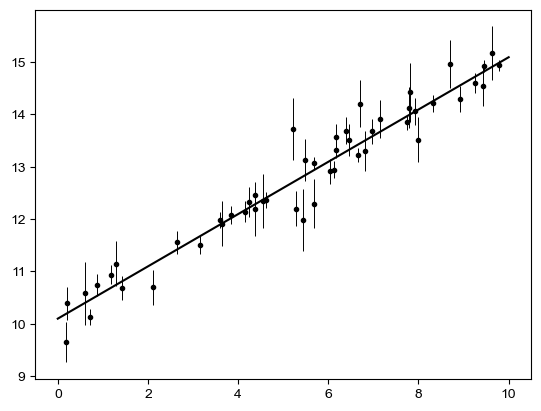

x-axis limits: (0.4519610485239501, 0.5475966156846623)
x-axis limits: (0.0, 1.0)
x-axis limits: (0.4519610485239501, 0.5475966156846623)
x-axis limits: (9.79056221431135, 10.407020703804434)


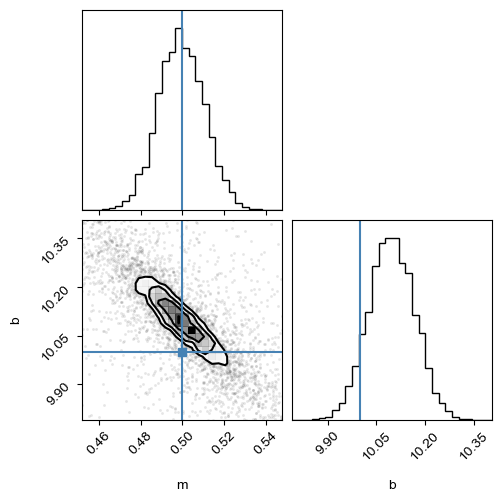

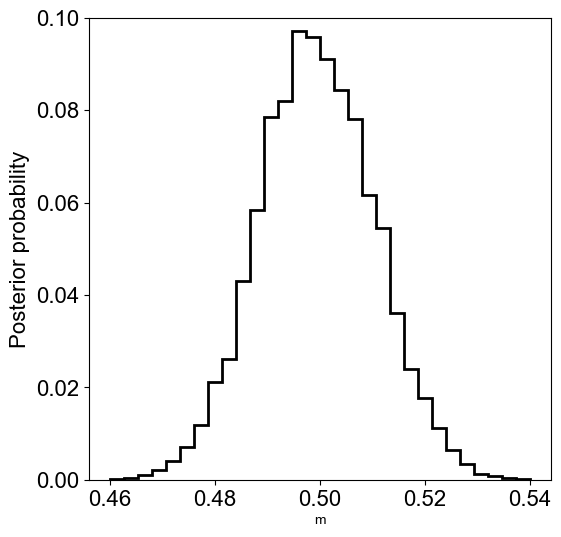

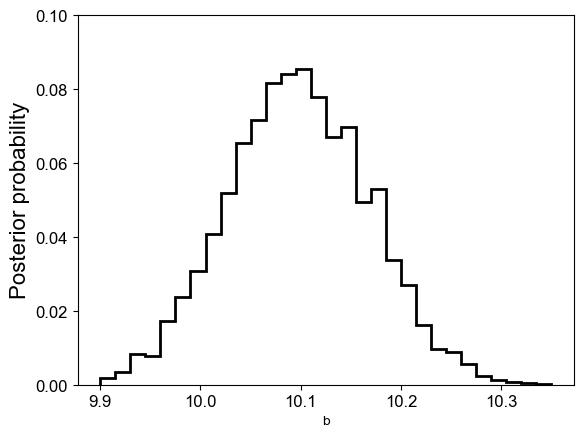

In [ ]:
#%% Example 1: fitting a straight line
np.random.seed(0)

def model(theta, x):
    m, c = theta
    return m*x + c

# Generate some data
theta_true = [0.5, 10.0]
N = 50
x = np.sort(10*np.random.rand(N))
y = model(theta_true, x)
yerr = 0.1+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)


# The likelihood function:
def loglike(theta):
    return -0.5*(np.sum((y-model(theta, x))**2/yerr**2))


# Defines a flat prior in 0 < m < 1, 0 < b < 100:
def prior_transform(theta):
    return np.array([1., 100.]) * theta


# Run nested sampling
res = nestle.sample(loglike, prior_transform, 2, method='single',
                    npoints=1000)
print(res.summary())

# weighted average and covariance:
p, cov = nestle.mean_and_cov(res.samples, res.weights)

print("m = {0:5.2f} +/- {1:5.2f}".format(p[0], np.sqrt(cov[0, 0])))
print("b = {0:5.2f} +/- {1:5.2f}".format(p[1], np.sqrt(cov[1, 1])))

# Plot the data and the fit corresponding to the mean of the posterior samples
plt.figure()
plt.errorbar(x, y, yerr=yerr, capsize=0, fmt='k.',elinewidth=0.7)
plt.plot([0., 10.], model(p, np.array([0., 10.])), c='k')
plt.show()

#%% Visualize the posterior samples using the corner package
fig = corner.corner(res.samples, weights=res.weights, labels=['m', 'b'],
                    range=[0.99999, 0.99999], truths=theta_true, bins=30, hist_kwargs={'density': True})

# Access the axes
axes = fig.get_axes()
plt.show()

# Make separate histograms of the m and b values with the posterior probability as the weights
a0 = res.weights
xrange = (0.46, 0.54)
# Make a histogram of the m values
fig, axes = plt.subplots(figsize=(6, 6))
axes.hist(res.samples[:, 0], bins=30, weights=a0, histtype='step', lw=2, range=xrange, color='k')
plt.xlabel('m')
plt.ylabel('Posterior probability', fontsize=16)
plt.ylim(0, 0.1)
#Make the plot square
#set aspect ratio to 1
ratio = 1
x_left, x_right = axes.get_xlim()
y_low, y_high = axes.get_ylim()
axes.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
# Set the x-axis tick spacing
x_spacing = (xrange[1] - xrange[0]) / 4
axes.xaxis.set_major_locator(MultipleLocator(x_spacing))  # Change 1 to your desired spacing
# Set fontsize of the tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
xrange = (9.9, 10.35)
# Make a histogram of the b values
plt.figure()
plt.hist(res.samples[:, 1], bins=30, weights=a0, histtype='step', lw=2, color='k', range=xrange)
plt.xlabel('b')
plt.ylabel('Posterior probability', fontsize=16)
plt.ylim(0, 0.1)
#Make the plot square
#set aspect ratio to 1
ratio = 1
x_left, x_right = axes.get_xlim()
y_low, y_high = axes.get_ylim()
axes.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
# Set the x-axis tick spacing
x_spacing = (xrange[1] - xrange[0]) / 4
axes.xaxis.set_major_locator(MultipleLocator(x_spacing))  # Change 1 to your desired spacing
# Set fontsize of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()





## Parameter inference for intronic RNA model using *FLC* intron 1 tiling data

### Input FLC intron 1 Total RNA data

In [2]:
#%% Input data

full_table = pd.read_csv('TotalRNA_hongchun_20140618_rel_UBC.txt', sep="\t",skiprows=1)

full_table = full_table.rename(columns={full_table.columns[0]: "Condition"})

nv_table = full_table.loc[0:2]

w2t0_table = full_table.loc[3:5]

w2t7_table = full_table.loc[6:8]

w4t0_table = full_table.loc[9:11]

w4t7_table = full_table.loc[12:14]

w6t0_table = full_table.loc[15:17]

w6t7_table = full_table.loc[18:20]

w8t0_table = full_table.loc[21:23]

w8t7_table = full_table.loc[24:26]



### Calculate levels relative to mean level at non-vernalised (NV) timepoint

In [3]:


#%% Calclulating levels relative to NV mean

nv_mean = nv_table.drop(columns="Condition").mean(axis=0).to_frame().T

nv_table = nv_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w2t0_table = w2t0_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w2t7_table = w2t7_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w4t0_table = w4t0_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w4t7_table = w4t7_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w6t0_table = w6t0_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w6t7_table = w6t7_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w8t0_table = w8t0_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

w8t7_table = w8t7_table.drop(columns="Condition").div(nv_mean.loc[0],axis='columns')

#%% Computing Mean tables

intron1_start = 294


locx = lambda x1,x2: x1 + (x2-x1)/2

x1 = np.array([438,670,840,993,1146,1533,1884,1841,2356,3197,3584,3643])
x2 = np.array([502,779,945,1105,1265,1670,2062,1953,2451,3333,3729,3752])

xv = (locx(x1,x2))/1000

intron1_internal_primer_list = ['FLC 438 502','FLC 670 779', 'FLC840 945','FLC 993 1105', 'FLC 1146 1265', 'FLC 1533 1670', 'FLC intron 1 middle', 'FLC 1884 2062', 'FLC 2356 2451', 'FLC 3197 3333', "FLC unspliced 3'", 'FLC 3643 3752']

mean_table = w2t0_table.mean(axis=0).to_frame().T
w2t0_means = mean_table.filter(intron1_internal_primer_list,axis=1)
mean_table = w2t7_table.mean(axis=0).to_frame().T
w2t7_means = mean_table.filter(intron1_internal_primer_list,axis=1)

mean_table = w4t0_table.mean(axis=0).to_frame().T
w4t0_means = mean_table.filter(intron1_internal_primer_list,axis=1)
mean_table = w4t7_table.mean(axis=0).to_frame().T
w4t7_means = mean_table.filter(intron1_internal_primer_list,axis=1)

mean_table = w6t0_table.mean(axis=0).to_frame().T
w6t0_means = mean_table.filter(intron1_internal_primer_list,axis=1)
mean_table = w6t7_table.mean(axis=0).to_frame().T
w6t7_means = mean_table.filter(intron1_internal_primer_list,axis=1)

mean_table = w8t0_table.mean(axis=0).to_frame().T
w8t0_means = mean_table.filter(intron1_internal_primer_list,axis=1)
mean_table = w8t7_table.mean(axis=0).to_frame().T
w8t7_means = mean_table.filter(intron1_internal_primer_list,axis=1)

#%% Computing Std dev tables

std_table = w2t0_table.std(axis=0).to_frame().T
w2t0_stds = std_table.filter(intron1_internal_primer_list,axis=1)
std_table = w2t7_table.std(axis=0).to_frame().T
w2t7_stds = std_table.filter(intron1_internal_primer_list,axis=1)

std_table = w4t0_table.std(axis=0).to_frame().T
w4t0_stds = std_table.filter(intron1_internal_primer_list,axis=1)
std_table = w4t7_table.std(axis=0).to_frame().T
w4t7_stds = std_table.filter(intron1_internal_primer_list,axis=1)

std_table = w6t0_table.std(axis=0).to_frame().T
w6t0_stds = std_table.filter(intron1_internal_primer_list,axis=1)
std_table = w6t7_table.std(axis=0).to_frame().T
w6t7_stds = std_table.filter(intron1_internal_primer_list,axis=1)

std_table = w8t0_table.std(axis=0).to_frame().T
w8t0_stds = std_table.filter(intron1_internal_primer_list,axis=1)
std_table = w8t7_table.std(axis=0).to_frame().T
w8t7_stds = std_table.filter(intron1_internal_primer_list,axis=1)


### Input Chromatin Bound RNA data (already normalised to mean NV level)

In [4]:

#%% ChrRNA data
locx = np.array([470,724.5,893.5,1050,1205.5,1601.5,1897.5,2092.5,2403.5,3265,3656.5,3697.5])/1000

w2t0_chr_means = np.array([0.536217273,0.399491208,0.558515234,0.523030545,0.544149271,0.565306215,0.353760569,0.552921315,0.747078758,0.589449854,0.377254347,0.530380653])
w2t0_chr_std = np.array([0.089998113,0.030237816,0.079650679,0.088629796,0.056674425,0.150962829,0.110305416,0.144692848,0.24475398,0.156363668,0.080446207,0.115047343	])*np.sqrt(3)

w4t0_chr_means = np.array([0.216727956,0.206109029,0.257983818,0.229652454,0.274285853,0.342442937,0.274727993,0.322008678,0.559265866,0.558136436,0.307346847,0.414104426])
w4t0_chr_std = np.array([0.036444045,0.038369836,0.04631243,0.039044991,0.055090009,0.071187746,0.028382582,0.051325165,0.132634561,0.104185346,0.040379335,0.06939557	])*np.sqrt(3)

#%%
# Reshape Chr data arrays
w2t0_chr_means = np.reshape(w2t0_chr_means, (-1,1))
w2t0_chr_std = np.reshape(w2t0_chr_std, (-1,1))
w4t0_chr_means = np.reshape(w4t0_chr_means, (-1,1))
w4t0_chr_std = np.reshape(w4t0_chr_std, (-1,1))


### Defining intronic RNA models for parameter inference at each timepoint (number of inferred parameters differs between timepoints - see Results section and Figures S3, S4, S5, S6)

### Model for 2 week timepoint:jointly fitting to chromatin bound RNA and total RNA data (4 inferred parameters)
### See supplementary information and Figure S3 for details

In [ ]:
# This model is used for jointly fitting to chromatin bound RNA and total RNA data at the 2W timepoint
# Four parameters are inferred: fc_init_tot, fc_init_chr, fc_splicing, frac
def fc_intron1_rna_model_together1(theta, x):
    fc_init_tot,fc_init_chr, fc_splicing, frac = theta
    vw = 0.04
    fc_speed = 0.8
    vc = fc_speed*vw
    ID = 0.294
    IA = 3.786
    ks = 2e-3
    ksc = fc_splicing*ks
    kld = 0.003
    #kldc = fc_lariat*kld
    
    cold_chr = lambda x: fc_init_chr*((IA-x)/vc + 1/(ksc) + frac*((x-ID)/kld))
    NV_chr = lambda x: 1*((IA-x)/vw + 1/(ks) +  frac*((x-ID)/kld))
    y_chr = cold_chr(x)/NV_chr(x)
    
    cold_total = lambda x: fc_init_tot*((IA-x)/vc + 1/(ksc) + 1*((x-ID)/kld))
    NV_total = lambda x: 1*((IA-x)/vw + 1/(ks) +  1*((x-ID)/kld))
    y_total = cold_total(x)/NV_total(x)
    
    y_pred = np.hstack([y_chr,y_total])
    y_pred = np.reshape(y_pred,(-1,1))
    return y_pred




### Alternative model for fitting to 2W data: This model includes lariat degradation in both directions

In [7]:
# This model is used for jointly fitting to chromatin bound RNA and total RNA data at the 2W timepoint
# Four parameters are inferred: fc_init_tot, fc_init_chr, fc_splicing, frac
def fc_intron1_rna_model_together3(theta, x):
    fc_init_tot,fc_init_chr, fc_splicing, frac = theta
    vw = 0.04
    fc_speed = 0.8
    vc = fc_speed*vw
    ID = 0.294
    IA = 3.786
    ks = 2e-3
    ksc = fc_splicing*ks
    kld5 = 0.003
    kld3 = 1e-4
    # frac=0.2
    crit_point = (IA*(kld5/kld3) + ID)/(1 + kld5/kld3)
    lariat = lambda x: 1*(x<crit_point)*((x-ID)/kld5) + 1*(x>=crit_point)*((IA-x)/kld3)
    cold_chr = lambda x: fc_init_chr*((IA-x)/vc + 1/(ksc) + frac*(lariat(x)))
    NV_chr = lambda x: 1*((IA-x)/vw + 1/(ks) +  frac*(lariat(x)))
    y_chr = cold_chr(x)/NV_chr(x)
    
    cold_total = lambda x: fc_init_tot*((IA-x)/vc + 1/(ksc) + 1*(lariat(x)))
    NV_total = lambda x: 1*((IA-x)/vw + 1/(ks) +  1*(lariat(x)))
    y_total = cold_total(x)/NV_total(x)
    
    y_pred = np.hstack([y_chr,y_total])
    y_pred = np.reshape(y_pred,(-1,1))
    return y_pred

### Model for 4 week timepoint: jointly fitting to chromatin bound RNA and total RNA data (3 inferred parameters)
### See supplementary information and Figure S4 for details

In [8]:

# This model is used for jointly fitting to chromatin bound RNA and total RNA data at the 4W timepoint
# Three parameters are inferred: fc_init_tot, fc_init_chr, fc_splicing
def fc_intron1_rna_model_together2(theta, x):
    fc_init_tot,fc_init_chr, fc_splicing = theta
    vw = 0.04
    fc_speed = 0.8
    vc = fc_speed*vw
    ID = 0.294
    IA = 3.786
    ks = 2e-3
    ksc = fc_splicing*ks
    kld = 0.003
    frac=0.17
    
    cold_chr = lambda x: fc_init_chr*((IA-x)/vc + 1/(ksc) + frac*((x-ID)/kld))
    NV_chr = lambda x: 1*((IA-x)/vw + 1/(ks) +  frac*((x-ID)/kld))
    y_chr = cold_chr(x)/NV_chr(x)
    
    cold_total = lambda x: fc_init_tot*((IA-x)/vc + 1/(ksc) + 1*((x-ID)/kld))
    NV_total = lambda x: 1*((IA-x)/vw + 1/(ks) +  1*((x-ID)/kld))
    y_total = cold_total(x)/NV_total(x)
    
    y_pred = np.hstack([y_chr,y_total])
    y_pred = np.reshape(y_pred,(-1,1))
    return y_pred


### Model for 6 and 8 week timepoint: fitting total RNA data (2 inferred parameters)
### See supplementary information and Figure S5 for details

In [9]:
# This model is used for jointly fitting to chromatin bound RNA and total RNA data at the 4W timepoint
# Two parameters are inferred: fc_init_tot, fc_splicing
def fc_intron1_rna_model_total(theta, x):
    fc_init_tot, fc_splicing = theta
    vw = 0.04
    fc_speed = 0.8
    vc = fc_speed*vw
    ID = 0.294
    IA = 3.786
    ks = 2e-3
    ksc = fc_splicing*ks
    kld = 0.003
   
    
    cold_total = lambda x: fc_init_tot*((IA-x)/vc + 1/(ksc) + 1*((x-ID)/kld))
    NV_total = lambda x: 1*((IA-x)/vw + 1/(ks) +  1*((x-ID)/kld))
    y_total = cold_total(x)/NV_total(x)
    
    y_pred = y_total
    y_pred = np.reshape(y_pred,(-1,1))
    return y_pred


### Model for post-cold timepoints: fitting total RNA data (2 inferred parameters)
### See supplementary information and Figure S6 for details

In [10]:
# This model is used for jointly fitting to chromatin bound RNA and total RNA data at the 4W timepoint
# Two parameters are inferred: fc_init_tot, fc_splicing
def fc_intron1_rna_model_total_postcold(theta, x):
    fc_init_tot, fc_splicing = theta
    vw = 0.04
    fc_speed = 1
    vc = fc_speed*vw
    ID = 0.294
    IA = 3.786
    ks = 2e-3
    ksc = fc_splicing*ks
    kld = 0.003
    frac=0.17
    
    cold_total = lambda x: fc_init_tot*((IA-x)/vc + 1/(ksc) + 1*((x-ID)/kld))
    NV_total = lambda x: 1*((IA-x)/vw + 1/(ks) +  1*((x-ID)/kld))
    y_total = cold_total(x)/NV_total(x)
    
    y_pred = y_total
    y_pred = np.reshape(y_pred,(-1,1))
    return y_pred




### Setup data arrays and models for nested sampling

In [ ]:

#%% Specify the timepoint for which nested sampling is to be performed
title = "6WT7"

#%% Depending on the timepoint, specify the model and data to be used for nested sampling
if title == "2WT0":
    model = lambda theta,x: fc_intron1_rna_model_together1(theta,x)
    y = np.vstack([w2t0_chr_means,np.transpose(w2t0_means)])
    y_err = np.vstack([w2t0_chr_std,np.transpose(w2t0_stds)])
    upper_limits = np.array([2,2,15,0.4])
    ndim = 4
    x = xv
elif title == "4WT0":
    model = lambda theta,x: fc_intron1_rna_model_together2(theta,x)
    y = np.vstack([w4t0_chr_means,np.transpose(w4t0_means)])
    y_err = np.vstack([w4t0_chr_std,np.transpose(w4t0_stds)])
    upper_limits = np.array([2,2,15])
    ndim = 3
    x = xv
elif title == "2WT0_only_TotalRNA":
    model = fc_intron1_rna_model_total
    y = np.transpose(np.array(w2t0_means))
    y_err = np.transpose(np.array(w2t0_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
elif title == "4WT0_only_TotalRNA":
    model = fc_intron1_rna_model_total
    y = np.transpose(np.array(w4t0_means))
    y_err = np.transpose(np.array(w4t0_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
elif title == "6WT0":
    model = fc_intron1_rna_model_total
    y = np.transpose(np.array(w6t0_means))
    y_err = np.transpose(np.array(w6t0_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
elif title == "8WT0":
    model = fc_intron1_rna_model_total
    y = np.transpose(np.array(w8t0_means))
    y_err = np.transpose(np.array(w8t0_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
elif title == "2WT7":
    model = fc_intron1_rna_model_total_postcold
    y = np.transpose(np.array(w2t7_means))
    y_err = np.transpose(np.array(w2t7_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
elif title == "4WT7":
    model = fc_intron1_rna_model_total_postcold
    y = np.transpose(np.array(w4t7_means))
    y_err = np.transpose(np.array(w4t7_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
elif title == "6WT7":
    model = fc_intron1_rna_model_total_postcold
    y = np.transpose(np.array(w6t7_means))
    y_err = np.transpose(np.array(w6t7_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
elif title == "8WT7":
    model = fc_intron1_rna_model_total_postcold
    y = np.transpose(np.array(w8t7_means))
    y_err = np.transpose(np.array(w8t7_stds))
    upper_limits = np.array([2,15])
    ndim = 2
    x = xv
    


### Perform nested sampling

In [12]:

#%%    
# Set seed for PRN generator
np.random.seed(0)


# Define the log-likelihood function:
def loglike(theta):
    return -0.5*(np.sum((y-model(theta, x))**2/y_err**2))
#%%

# Defines a flat prior in 0 < fc_init_tot,fc_init_chr < 1, 0 < fc_splicing < 10, 0 < fc_speed < 5:
def prior_transform(theta):
    return upper_limits * theta


# Run nested sampling
res = nestle.sample(loglike, prior_transform, ndim, method='single',
                    npoints=10000, callback=nestle.print_progress)
print(res.summary())

#%% Show output
# weighted average and covariance:
p, cov = nestle.mean_and_cov(res.samples, res.weights)

print(title)
print("fc_init_tot = {0:5.2f} +/- {1:5.2f}".format(p[0], np.sqrt(cov[0, 0])))
# print("fc_init_chr = {0:5.2f} +/- {1:5.2f}".format(p[1], np.sqrt(cov[1, 1])))
# print("fc_splicing = {0:5.2f} +/- {1:5.2f}".format(p[2], np.sqrt(cov[2, 2])))
# print("frac = {0:5.2f} +/- {1:5.2f}".format(p[3], np.sqrt(cov[3, 3])))
# print("fc_splicing = {0:5.2f} +/- {1:5.2f}".format(p[0], np.sqrt(cov[0, 0])))
print("fc_splicing = {0:5.2f} +/- {1:5.2f}".format(p[1], np.sqrt(cov[1, 1])))




it=102340 logz=-18.001169502191773niter: 102341
ncall: 300070
nsamples: 112341
logz: -17.577 +/-  0.029
h:  8.361
6WT7
fc_init_tot =  0.09 +/-  0.01
fc_splicing =  1.00 +/-  0.16


### Plot distribution of posterior samples using the *corner* package

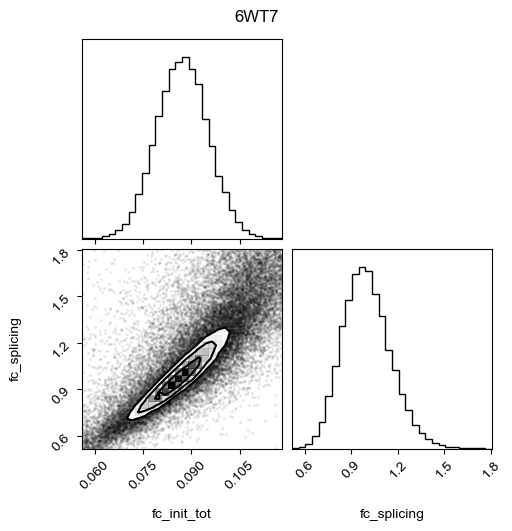

In [16]:
# Labels argument to corner.corner must be specified as appropriate 
#%%
fig = corner.corner(res.samples, weights=res.weights, labels=['fc_init_tot','fc_splicing'],
                    range=[0.9999, 0.9999], bins=30)
plt.suptitle(title)
# Save figure
plt.savefig(title + '_posterior.pdf', bbox_inches='tight')
plt.show()





### Plot separate histograms of the posterior samples for each inferred parameter

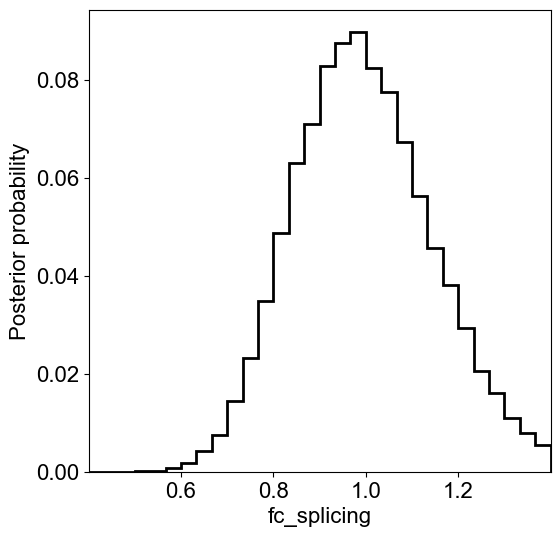

In [17]:
# Plot the 1-parameter histograms with Y-axis ticks (x axis labels must be set as appropriate)
a0 = res.weights
xrange = (0.4,1.4)
# Make a histogram of the m values
fig, axes = plt.subplots(figsize=(6, 6))
axes.hist(res.samples[:, 1], bins=30, weights=a0, histtype='step', lw=2,  range = xrange, color='k')
plt.xlabel('fc_splicing', fontsize=16)
plt.ylabel('Posterior probability', fontsize=16)
# plt.ylim(0, 0.08)
plt.xlim(xrange)
#Make the plot square
#set aspect ratio to 1
ratio = 1
x_left, x_right = axes.get_xlim()
y_low, y_high = axes.get_ylim()
axes.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

# Set x-tick locations
axes.set_xticks([0.6,0.8,1.0,1.2])
# Set fontsize of the tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Save figure (filename must be set as appropriate)
plt.savefig(title + '_fc_splicing.pdf', bbox_inches='tight')
plt.show()

### Compare model predictions to data, using the mean values of the posterior samples for the inferred parameters

### Plotting Chromatin bound RNA and Total RNA fits together (for 2W and 4W timepoints)

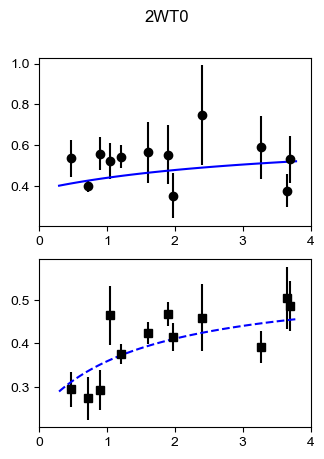

In [ ]:
#%%
ID = 0.294
IA = 3.786
xvec = np.linspace(ID,IA,num=100,endpoint=True)
nx = xvec.shape[0] 
ypred = model(p, xvec)

fig, axes = plt.subplots(2,1)
plt.suptitle(title)
axes[0].errorbar(xv,y[0:12].flatten(),yerr=y_err[0:12].flatten()/np.sqrt(3),fmt='ko')
axes[0].plot(xvec,ypred[0:nx],'-b')
# axes[0].set_ylim([ylim_lower , ylim_upper])
# axes[0].set_ylim([0,1])
axes[0].set_xlim([0,4])
#set aspect ratio to 1
ratio = 1/1.616
x_left, x_right = axes[0].get_xlim()
y_low, y_high = axes[0].get_ylim()
axes[0].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

axes[1].errorbar(xv,y[12:].flatten(),yerr=y_err[12:].flatten()/np.sqrt(3),fmt='ks')
axes[1].plot(xvec,ypred[nx:],'--b')
# axes[1].set_ylim([ylim_lower , ylim_upper])
# axes[1].set_ylim([0,1])
axes[1].set_xlim([0,4])
#set aspect ratio to 1
ratio = 1/1.616
x_left, x_right = axes[1].get_xlim()
y_low, y_high = axes[1].get_ylim()
axes[1].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

# Save the figure as a PDF
plt.savefig(title + '.pdf')

# Display the plot
plt.show()

### Plotting total RNA fits (6W, 8W and all post-cold timepoints)

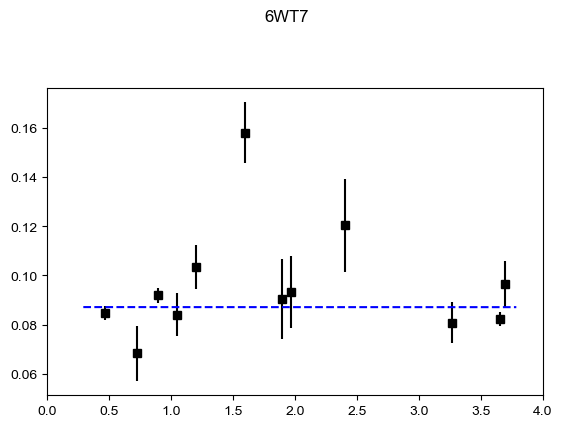

In [20]:


#%%
ID = 0.294
IA = 3.786
xvec = np.linspace(ID,IA,num=100,endpoint=True)
nx = xvec.shape[0] 
ypred = model(p, xvec)


fig, axes = plt.subplots(1,1)
plt.suptitle(title)
axes.errorbar(x,y[0:].flatten(),yerr=y_err[0:].flatten()/np.sqrt(3),fmt='ks')
axes.plot(xvec,ypred[0:nx],'--b')
# axes[0].set_ylim([ylim_lower , ylim_upper])
# axes.set_ylim([0,1])
axes.set_xlim([0,4])
#set aspect ratio to 1
ratio = 1/1.616
x_left, x_right = axes.get_xlim()
y_low, y_high = axes.get_ylim()
axes.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

# Save the figure as a PDF
plt.savefig(title + '_fit.pdf')

plt.show()



## Figure S9: Concurrent reduction in Initiation rate and Pol II speed, in the Wu et al., 2016 model, fails to capture the qualitative trends in the 2WT0 data

In [ ]:
# This model is used for jointly fitting to chromatin bound RNA and total RNA data at the 2W timepoint
# Three parameters are inferred: fc_init_tot, fc_init_chr, fc_speed
def fc_intron1_rna_model_together4(theta, x):
    fc_init_tot, fc_init_chr, fc_speed = theta
    vw = 0.04
    vc = fc_speed*vw
    ID = 0.294
    IA = 3.786
    ks = 2e-3
    kld = 0.003
    
    cold_chr = lambda x: fc_init_chr*((IA-x)/vc + 1/(ks))
    NV_chr = lambda x: 1*((IA-x)/vw + 1/(ks))
    y_chr = cold_chr(x)/NV_chr(x)
    
    cold_total = lambda x: fc_init_tot*((IA-x)/vc + 1/(ks) + 1*((x-ID)/kld))
    NV_total = lambda x: 1*((IA-x)/vw + 1/(ks) +  1*((x-ID)/kld))
    y_total = cold_total(x)/NV_total(x)
    
    y_pred = np.hstack([y_chr,y_total])
    y_pred = np.reshape(y_pred,(-1,1))
    return y_pred

title = "2WT0_only_init_and_speed_changes"
model = lambda theta,x: fc_intron1_rna_model_together4(theta,x)
y = np.vstack([w2t0_chr_means,np.transpose(w2t0_means)])
y_err = np.vstack([w2t0_chr_std,np.transpose(w2t0_stds)])
x = xv

### Calculate the best fit parameter values using scipy.optimize.minimize

In [43]:
# Find the best fit, i.e. minimum sum-squared error values of the parameters using only chromatin bound and total RNA data
# This is equivalent to finding the maximum likelihood estimate
# Therefore, find the maximum of the log-likelihood function using an optimization routine with bounds
# Define the negative of the log-likelihood function:
def loglike(theta):
    return 0.5*(np.sum((y-model(theta, x))**2/y_err**2))
#%%
from scipy.optimize import minimize
bounds = [(0,2),(0,2),(0,0.5)] # bounds for the fold-change parameters: Fold-change in Pol II speed is constrained to be less than 0.5
p0 = np.array([1,1,0.5])
res = minimize(loglike, p0, bounds=bounds, method='COBYLA')
print(title)
print("fc_init_tot = {0:5.2f}".format(res.x[0]))
print("fc_init_chr = {0:5.2f}".format(res.x[1]))
print("fc_speed = {0:5.2f}".format(res.x[2]))


2WT0_only_init_and_speed_changes
fc_init_tot =  0.38
fc_init_chr =  0.41
fc_speed =  0.50


### Make plots

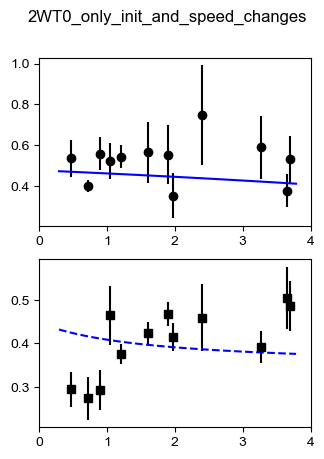

In [44]:
#%%
ID = 0.294
IA = 3.786
xvec = np.linspace(ID,IA,num=100,endpoint=True)
nx = xvec.shape[0] 
ypred = model(res.x, xvec)

fig, axes = plt.subplots(2,1)
plt.suptitle(title)
axes[0].errorbar(xv,y[0:12].flatten(),yerr=y_err[0:12].flatten()/np.sqrt(3),fmt='ko')
axes[0].plot(xvec,ypred[0:nx],'-b')
# axes[0].set_ylim([ylim_lower , ylim_upper])
# axes[0].set_ylim([0,1])
axes[0].set_xlim([0,4])
#set aspect ratio to 1
ratio = 1/1.616
x_left, x_right = axes[0].get_xlim()
y_low, y_high = axes[0].get_ylim()
axes[0].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

axes[1].errorbar(xv,y[12:].flatten(),yerr=y_err[12:].flatten()/np.sqrt(3),fmt='ks')
axes[1].plot(xvec,ypred[nx:],'--b')
# axes[1].set_ylim([ylim_lower , ylim_upper])
# axes[1].set_ylim([0,1])
axes[1].set_xlim([0,4])
#set aspect ratio to 1
ratio = 1/1.616
x_left, x_right = axes[1].get_xlim()
y_low, y_high = axes[1].get_ylim()
axes[1].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

# Save the figure as a PDF
plt.savefig('only_init_and_speed_changes.pdf')

# Display the plot
plt.show()